In [1]:
import numpy as np 
import pandas as pd 

In [2]:
dataset = pd.read_csv("C:/Users/kalle/Documents/project/ashrae-energy-prediction/dataset.csv")

In [3]:
dataset

,building_id,meter,timestamp,primary_use,square_feet,year_built,air_temperature,cloud_coverage,dew_temperature,meter_reading
0,0,0,01-01-2016 00:00,Education,7432,2008.0,25.0,6.0,20.0,0.00
1,1,0,01-01-2016 00:00,Education,2720,2004.0,24.4,NaN,21.1,0.00
2,2,0,01-01-2016 00:00,Education,5376,1991.0,22.8,2.0,21.1,0.00
3,3,0,01-01-2016 00:00,Education,23685,2002.0,21.1,2.0,20.6,0.00
4,4,0,01-01-2016 00:00,Education,116607,1975.0,20.0,2.0,20.0,0.00
...,...,...,...,...,...,...,...,...,...,...
994,994,1,01-01-2016 00:00,Education,108392,NaN,4.4,0.0,0.6,2432.45
995,995,0,01-01-2016 00:00,Education,46230,NaN,4.4,0.0,1.1,0.00
996,996,0,01-01-2016 00:00,Education,77632,NaN,3.3,2.0,0.6,362.98
997,997,1,01-01-2016 00:00,Office,38173,NaN,6.1,0.0,0.6,1491.22


In [4]:
dataset["timestamp"] = pd.to_datetime(dataset["timestamp"])
dataset["hour"] = dataset["timestamp"].dt.hour
dataset["day"] = dataset["timestamp"].dt.day
dataset["weekend"] = dataset["timestamp"].dt.weekday
dataset["month"] = dataset["timestamp"].dt.month

In [5]:
dataset

,building_id,meter,timestamp,primary_use,square_feet,year_built,air_temperature,cloud_coverage,dew_temperature,meter_reading,hour,day,weekend,month
0,0,0,2016-01-01,Education,7432,2008.0,25.0,6.0,20.0,0.00,0,1,4,1
1,1,0,2016-01-01,Education,2720,2004.0,24.4,NaN,21.1,0.00,0,1,4,1
2,2,0,2016-01-01,Education,5376,1991.0,22.8,2.0,21.1,0.00,0,1,4,1
3,3,0,2016-01-01,Education,23685,2002.0,21.1,2.0,20.6,0.00,0,1,4,1
4,4,0,2016-01-01,Education,116607,1975.0,20.0,2.0,20.0,0.00,0,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,994,1,2016-01-01,Education,108392,NaN,4.4,0.0,0.6,2432.45,0,1,4,1
995,995,0,2016-01-01,Education,46230,NaN,4.4,0.0,1.1,0.00,0,1,4,1
996,996,0,2016-01-01,Education,77632,NaN,3.3,2.0,0.6,362.98,0,1,4,1
997,997,1,2016-01-01,Office,38173,NaN,6.1,0.0,0.6,1491.22,0,1,4,1


In [6]:
dataset = dataset.drop("timestamp", axis = 1)

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()
dataset["primary_use"] = le.fit_transform(dataset["primary_use"])

In [9]:
dataset

,building_id,meter,primary_use,square_feet,year_built,air_temperature,cloud_coverage,dew_temperature,meter_reading,hour,day,weekend,month
0,0,0,0,7432,2008.0,25.0,6.0,20.0,0.00,0,1,4,1
1,1,0,0,2720,2004.0,24.4,NaN,21.1,0.00,0,1,4,1
2,2,0,0,5376,1991.0,22.8,2.0,21.1,0.00,0,1,4,1
3,3,0,0,23685,2002.0,21.1,2.0,20.6,0.00,0,1,4,1
4,4,0,0,116607,1975.0,20.0,2.0,20.0,0.00,0,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,994,1,0,108392,NaN,4.4,0.0,0.6,2432.45,0,1,4,1
995,995,0,0,46230,NaN,4.4,0.0,1.1,0.00,0,1,4,1
996,996,0,0,77632,NaN,3.3,2.0,0.6,362.98,0,1,4,1
997,997,1,6,38173,NaN,6.1,0.0,0.6,1491.22,0,1,4,1


In [10]:
def data_preprocessing(df):
    for col in df.columns:
        if df[col].dtype != object: 
            if not np.isfinite(df[col]).all():
                mean=df[col].mean()
                mean=round(mean,2)
                print("mean value for :",col,mean)
                df[col].fillna(mean,inplace=True)  
    return df

In [11]:
dataset=data_preprocessing(dataset)

mean value for : year_built 1969.08
mean value for : air_temperature 14.88
mean value for : cloud_coverage 3.42
mean value for : dew_temperature 9.1


In [12]:
dataset

,building_id,meter,primary_use,square_feet,year_built,air_temperature,cloud_coverage,dew_temperature,meter_reading,hour,day,weekend,month
0,0,0,0,7432,2008.00,25.0,6.00,20.0,0.00,0,1,4,1
1,1,0,0,2720,2004.00,24.4,3.42,21.1,0.00,0,1,4,1
2,2,0,0,5376,1991.00,22.8,2.00,21.1,0.00,0,1,4,1
3,3,0,0,23685,2002.00,21.1,2.00,20.6,0.00,0,1,4,1
4,4,0,0,116607,1975.00,20.0,2.00,20.0,0.00,0,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,994,1,0,108392,1969.08,4.4,0.00,0.6,2432.45,0,1,4,1
995,995,0,0,46230,1969.08,4.4,0.00,1.1,0.00,0,1,4,1
996,996,0,0,77632,1969.08,3.3,2.00,0.6,362.98,0,1,4,1
997,997,1,6,38173,1969.08,6.1,0.00,0.6,1491.22,0,1,4,1


In [13]:
target=(dataset["meter_reading"])

In [14]:
target

0         0.00
1         0.00
2         0.00
3         0.00
4         0.00
        ...   
994    2432.45
995       0.00
996     362.98
997    1491.22
998    4791.84
Name: meter_reading, Length: 999, dtype: float64

In [15]:
target.max()

4791.84

In [16]:
for i in range(999):
    if target.iloc[i] >= 0 and target.iloc[i] <=1000:
        target.iloc[i]=1
    elif target.iloc[i] >= 1001 and target.iloc[i] <= 2000:
        target.iloc[i]=2
    elif target.iloc[i] >= 2001 and target.iloc[i] <= 3000:
        target.iloc[i]=3
    elif target.iloc[i] >= 3001 and target.iloc[i] <= 4000:
        target.iloc[i]=4
    else:
        target.iloc[i]=5

C:\Users\kalle\AppData\Local\Temp\ipykernel_7336\3883613396.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target.iloc[i]=1
C:\Users\kalle\AppData\Local\Temp\ipykernel_7336\3883613396.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target.iloc[i]=1
C:\Users\kalle\AppData\Local\Temp\ipykernel_7336\3883613396.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target.iloc[i]=1
C:\Users\kalle\AppData\Local\Temp\ipykernel_7336\388

C:\Users\kalle\AppData\Local\Temp\ipykernel_7336\3883613396.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target.iloc[i]=1
C:\Users\kalle\AppData\Local\Temp\ipykernel_7336\3883613396.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target.iloc[i]=1
C:\Users\kalle\AppData\Local\Temp\ipykernel_7336\3883613396.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target.iloc[i]=1
C:\Users\kalle\AppData\Local\Temp\ipykernel_7336\388

In [17]:
target

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
994    3.0
995    1.0
996    1.0
997    2.0
998    5.0
Name: meter_reading, Length: 999, dtype: float64

In [18]:
dataset = dataset.drop("meter_reading", axis = 1)

In [19]:
dataset

,building_id,meter,primary_use,square_feet,year_built,air_temperature,cloud_coverage,dew_temperature,hour,day,weekend,month
0,0,0,0,7432,2008.00,25.0,6.00,20.0,0,1,4,1
1,1,0,0,2720,2004.00,24.4,3.42,21.1,0,1,4,1
2,2,0,0,5376,1991.00,22.8,2.00,21.1,0,1,4,1
3,3,0,0,23685,2002.00,21.1,2.00,20.6,0,1,4,1
4,4,0,0,116607,1975.00,20.0,2.00,20.0,0,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
994,994,1,0,108392,1969.08,4.4,0.00,0.6,0,1,4,1
995,995,0,0,46230,1969.08,4.4,0.00,1.1,0,1,4,1
996,996,0,0,77632,1969.08,3.3,2.00,0.6,0,1,4,1
997,997,1,6,38173,1969.08,6.1,0.00,0.6,0,1,4,1


In [20]:
x=dataset

In [21]:
x

,building_id,meter,primary_use,square_feet,year_built,air_temperature,cloud_coverage,dew_temperature,hour,day,weekend,month
0,0,0,0,7432,2008.00,25.0,6.00,20.0,0,1,4,1
1,1,0,0,2720,2004.00,24.4,3.42,21.1,0,1,4,1
2,2,0,0,5376,1991.00,22.8,2.00,21.1,0,1,4,1
3,3,0,0,23685,2002.00,21.1,2.00,20.6,0,1,4,1
4,4,0,0,116607,1975.00,20.0,2.00,20.0,0,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
994,994,1,0,108392,1969.08,4.4,0.00,0.6,0,1,4,1
995,995,0,0,46230,1969.08,4.4,0.00,1.1,0,1,4,1
996,996,0,0,77632,1969.08,3.3,2.00,0.6,0,1,4,1
997,997,1,6,38173,1969.08,6.1,0.00,0.6,0,1,4,1


In [22]:
y=target

In [23]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
994    3.0
995    1.0
996    1.0
997    2.0
998    5.0
Name: meter_reading, Length: 999, dtype: float64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

In [27]:
model=GradientBoostingClassifier(n_estimators = 10,random_state=7)

In [28]:
model.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=10, random_state=7)

In [29]:
y_pred=model.predict(x_test)

In [30]:
y_pred

array([5., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       2., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1.,
       1., 4., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 4., 1., 1., 1., 1.])

In [31]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

In [32]:
print(confusion_matrix(y_test,y_pred))

[[184   3   1   2   1]
 [  3   0   1   0   0]
 [  4   0   0   0   0]
 [  1   0   0   0   0]
 [  0   0   0   0   0]]


In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.96      0.96      0.96       191
         2.0       0.00      0.00      0.00         4
         3.0       0.00      0.00      0.00         4
         4.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         0

    accuracy                           0.92       200
   macro avg       0.19      0.19      0.19       200
weighted avg       0.92      0.92      0.92       200



C:\Users\kalle\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kalle\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kalle\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
print(round((accuracy_score(y_test, y_pred)*100),2))

92.0


In [35]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Predictions')

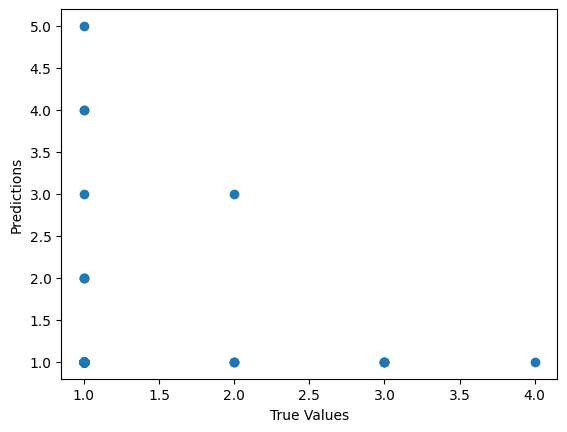

In [36]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')